In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
%matplotlib inline

print('Dependecies installed!')

Dependecies installed!


In [2]:
# Creating the run_query function:
chinook = 'ChinookDatabase/DataSources/Chinook_Sqlite.sqlite'

def run_query(q):
    with sqlite3.connect(chinook) as conn:
        return pd.read_sql(q, conn)
    
def run_command(c):
    with sqlite3.connect(chinook) as conn:
        conn.isolation_level = None
        conn.execute(c)
    
def show_tables():
    q = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table","view");
    '''
    return run_query(q)

print('Displaying all tables:')
show_tables()

Displaying all tables:


,name,type
0,Album,table
1,Artist,table
2,Customer,table
3,Employee,table
4,Genre,table
5,Invoice,table
6,InvoiceLine,table
7,MediaType,table
8,Playlist,table
9,PlaylistTrack,table


# Finding the most popular genre in the USA:

In [3]:
# Creating the query:
creating_popular_genres_in_usa = '''
WITH selecting_tracks_from_USA AS (
    SELECT il.*
    FROM InvoiceLine il
    INNER JOIN Invoice i ON i.InvoiceId = il.InvoiceId
    INNER JOIN Customer c ON c.CustomerId = i.CustomerId
    WHERE c.Country = 'USA')
           
SELECT 
    g.Name genre,
    COUNT(usa.InvoiceLineId) tracks_sold,
    CAST(COUNT(usa.InvoiceLineId) AS Float) / (SELECT COUNT(*) FROM selecting_tracks_from_USA) percentage_sold
FROM selecting_tracks_from_USA usa
INNER JOIN Track t ON t.TrackId = usa.TrackId
INNER JOIN Genre g ON g.GenreId = t.GenreId
GROUP BY g.Name
ORDER BY tracks_sold DESC
LIMIT 15;
'''

# Displaying the query in a table:
print('Displaying the most popular genre in the USA:')
run_query(creating_popular_genres_in_usa)

Displaying the most popular genre in the USA:


,genre,tracks_sold,percentage_sold
0,Rock,157,0.317814
1,Latin,91,0.184211
2,Metal,64,0.129555
3,Alternative & Punk,50,0.101215
4,Jazz,22,0.044534
5,Blues,15,0.030364
6,TV Shows,14,0.028340
7,R&B/Soul,12,0.024291
8,Classical,8,0.016194
9,Comedy,8,0.016194


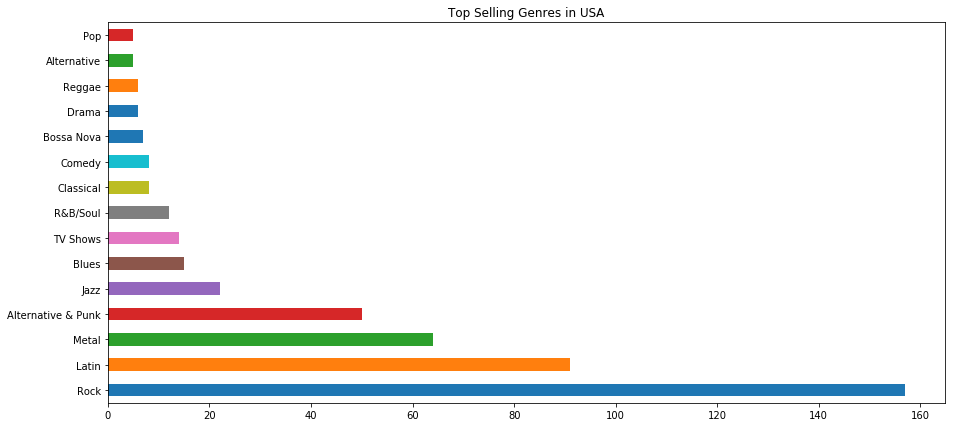

In [4]:
# Saving query in a varaible:
genre_sales_usa = run_query(creating_popular_genres_in_usa)

# Setting the index label.
genre_sales_usa.set_index("genre", inplace=True)

# Creating barh plot:
genre_sales_usa['tracks_sold'].plot.barh(title='Top Selling Genres in USA', figsize=(15, 7))
plt.ylabel('')
plt.show()

The 3 artists the will have the most success are Red Tone, Slim Jim Bites and Meteor and The Girls. However, combining the 3 artists together, they do not come close to the size of the market that Rock has.

# Evaluating employee performance:

In [5]:
# Creating the query:
creating_employee_performance = '''
WITH only_sales_support_agents AS (
    SELECT *
    FROM Employee e
    WHERE e.Title = 'Sales Support Agent')
    
SELECT
    ossa.FirstName || ' ' || ossa.LastName employee_name,
    ossa.HireDate hiring_date,
    COUNT(c.SupportRepId) total_sales,
    SUM(i.total) total_value_of_sales
FROM only_sales_support_agents ossa
INNER JOIN Customer c ON c.SupportRepId = ossa.EmployeeId
INNER JOIN Invoice i ON i.CustomerId = c.CustomerId
GROUP BY employee_name;
'''

# Displaying the query in a table:
print('Displaying all Sales Support Agents:')
run_query(creating_employee_performance)

Displaying all Sales Support Agents:


,employee_name,hiring_date,total_sales,total_value_of_sales
0,Jane Peacock,2002-04-01 00:00:00,146,833.04
1,Margaret Park,2003-05-03 00:00:00,140,775.40
2,Steve Johnson,2003-10-17 00:00:00,126,720.16


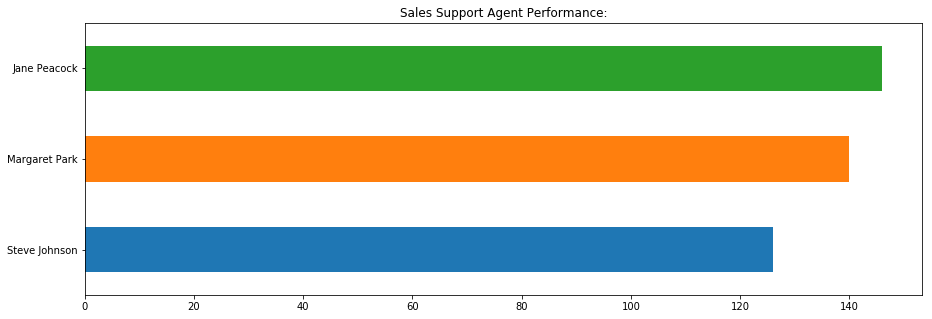

In [6]:
# Saving query in a varaible:
employee_performance = run_query(creating_employee_performance)

# Setting the index label.
employee_performance.set_index("employee_name", inplace=True)

# Sorting the values from high to low:
employee_performance.sort_values('total_sales', inplace=True)

# Creating barh plot:
employee_performance['total_sales'].plot.barh(title='Sales Support Agent Performance:', figsize=(15, 5))
plt.ylabel('')
plt.show()

It looks that all 3 employees are performing similarly to each other; however, Steve Johnson who has the least amount of sales is also the last person to have been hired.

# Analyzing the sales data for customers from each different country:

In [7]:
creating_countries = '''
SELECT 
    CASE WHEN (SELECT COUNT(Country) FROM Customer c WHERE c.Country = Country) = 1 THEN 'Other'
        ELSE c.Country
    END AS country,
    c.CustomerId customer,
    SUM(i.Total) total_sales,
    SUM(il.UnitPrice) / COUNT(DISTINCT c.CustomerId) averages_sales_per_customer,
    SUM(il.UnitPrice) / COUNT(DISTINCT il.InvoiceId) average_order_value
FROM Invoice i
INNER JOIN Customer c ON c.CustomerId = i.CustomerId
INNER JOIN InvoiceLine il ON il.InvoiceId = i.InvoiceId
GROUP BY country
ORDER BY total DESC
'''

run_query(creating_countries)

,country,customer,total_sales,averages_sales_per_customer,average_order_value
0,Czech Republic,6,879.24,45.120000,6.445714
1,Finland,44,350.62,41.620000,5.945714
2,Netherlands,48,352.62,40.620000,5.802857
3,Argentina,56,334.62,37.620000,5.374286
4,Australia,55,334.62,37.620000,5.374286
5,Denmark,9,334.62,37.620000,5.374286
6,Italy,47,334.62,37.620000,5.374286
7,Portugal,35,687.24,38.620000,5.517143
8,Sweden,51,340.62,38.620000,5.517143
9,Brazil,12,1677.10,38.020000,5.431429


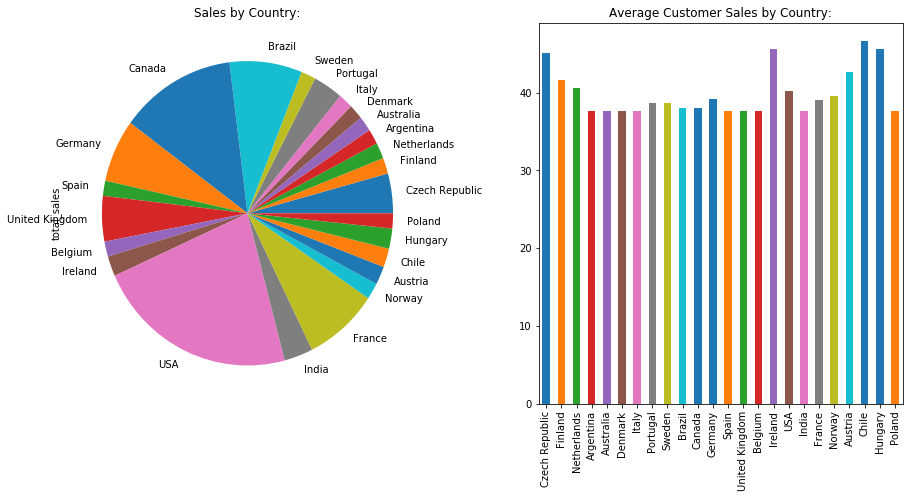

In [8]:
# Saving query in a varaible:
countries = run_query(creating_countries)

# Setting the index label.
countries.set_index("country", inplace=True)

# Setting dimensions of plots:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
ax1, ax2 = axes.flatten()
fig.subplots_adjust(hspace=.5, wspace=.3)

# Creating pie plot:
countries["total_sales"].plot.pie(ax=ax1, title='Sales by Country:')
plt.ylabel('')

# Creating bar plot:
countries["averages_sales_per_customer"].plot.bar(ax=ax2, title='Average Customer Sales by Country:')
plt.xlabel('')

plt.show()

USA and Cancada have the biggest market value followed by Germany. Most of the other countries share a similar market value.

# Evaluating whether purchasing popular songs or albums is more profitable:

In [18]:
creating_invoice = '''
WITH invoice_first_track AS (
    SELECT
        il.InvoiceId invoice_id,
        MIN(il.TrackId) first_track_id
    FROM InvoiceLine il
    GROUP BY invoice_id)

SELECT
    album_purchase,
    COUNT(invoice_id) number_of_invoices,
    CAST(count(invoice_id) AS FLOAT) / (SELECT COUNT(*) FROM Invoice) percent
FROM
    (SELECT
        ifs.*,
        CASE
            WHEN (SELECT t.TrackId FROM Track t
                  WHERE t.AlbumId = (SELECT t2.AlbumId 
                                      FROM Track t2
                                      WHERE t2.TrackId = ifs.first_track_id) 
                                     
                  EXCEPT 
                  
                  SELECT il2.TrackId 
                  FROM InvoiceLine il2
                  WHERE il2.InvoiceId = ifs.invoice_id) IS NULL THEN "yes"
             ELSE "no"
         END AS "album_purchase"
     FROM invoice_first_track ifs)
GROUP BY album_purchase
'''
run_query(creating_invoice)

,album_purchase,number_of_invoices,percent
0,no,400,0.970874
1,yes,12,0.029126
